In [53]:
from scipy import signal
from scipy.signal import lfilter
import matplotlib.pyplot as plt
import numpy as np

In [42]:
fp = 10
fa = 18
Ap = 3
Aa = 30
fs = 100
sig_freqs = [1, 10, 14, 18, 50]
sig_dur = 1

In [6]:
N, beta = signal.kaiserord(Aa, (fa-fp)/(fs/2))

In [7]:
print(N, beta)

21 2.1166248611409806


In [33]:
taps = signal.firwin(N, cutoff=fa, window=('kaiser', beta), fs=fs)

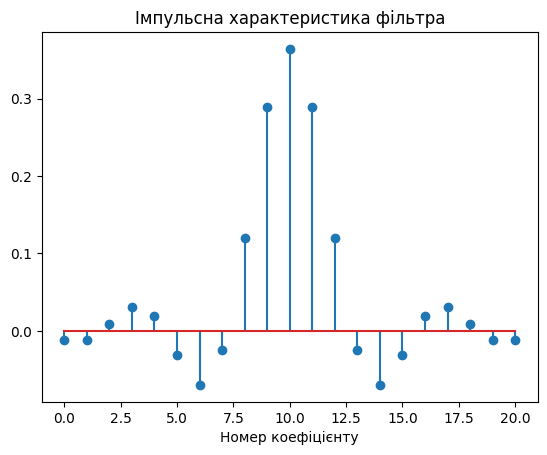

In [57]:
plt.stem(taps)
plt.xlabel('Номер коефіцієнту')
plt.title('Імпульсна характеристика фільтра')
plt.show()

In [35]:
w, h = signal.freqz(taps, 1)

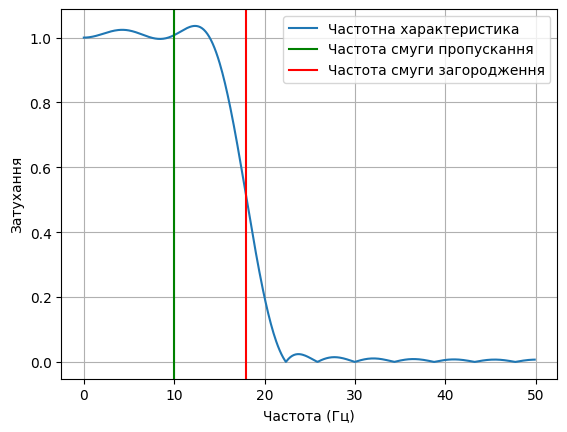

In [36]:
plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="Частотна характеристика")
plt.axvline(fp, color='green', label="Частота смуги пропускання")
plt.axvline(fa, color='red', label="Частота смуги загородження")
plt.xlabel('Частота (Гц)')
plt.ylabel('Затухання')
plt.grid(True)
plt.legend()
plt.show()

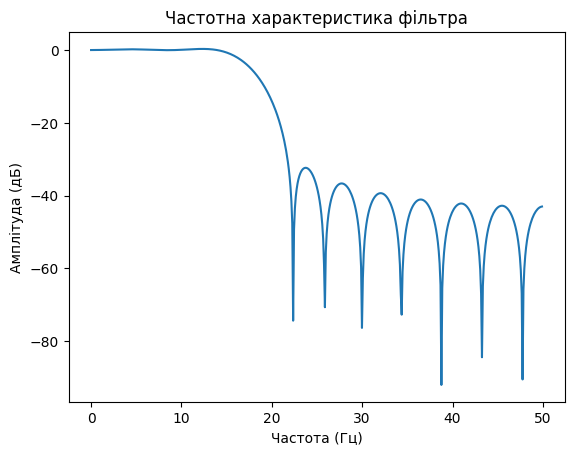

In [64]:
w, h_freqz = signal.freqz(taps)

# Обчислення ФП
h_phase = np.unwrap(np.angle(h_freqz))
h_db = 20*np.log10(np.abs(h_freqz))

# Візуалізація ЧХ
plt.plot((fs * 0.5 / np.pi) * w, h_db)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплітуда (дБ)')
plt.title('Частотна характеристика фільтра')
plt.show()

In [65]:
t = np.linspace(0, sig_dur, int(sig_dur * fs))
test_signal = np.zeros_like(t)
for cf in sig_freqs:
    test_signal += np.sin(2 * np.pi * cf * t)

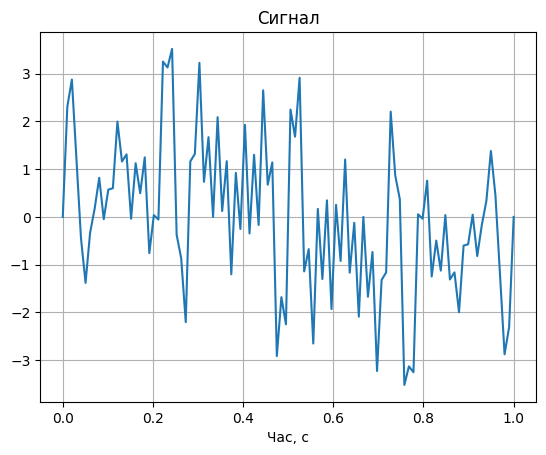

In [66]:
plt.plot(t, test_signal)
plt.xlabel("Час, с")
plt.title("Cигнал")
plt.grid()
plt.show()

In [67]:
filtered_signal = lfilter(taps, 1, test_signal)

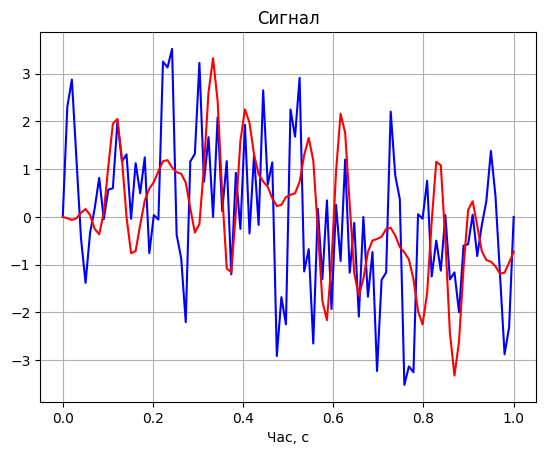

In [68]:
plt.plot(t, test_signal, 'b')
plt.plot(t, filtered_signal, 'r')
plt.xlabel("Час, с")
plt.title("Cигнал")
plt.grid()
plt.show()

In [75]:
# Рассчитываем АЧХ и ФЧХ фильтра
w, h = signal.freqz(taps)
print(len(h))
nyq_rate = fs / 2
# Определяем коэффициенты передачи фильтра на частотах гармонических составляющих тестового сигнала
for cf in sig_freqs:
    index = int(cf / nyq_rate * len(w))
    gain = abs(h[cf])
    print(f"Частота: {cf} Гц, Коэффициент передачи: {gain}")

512
Частота: 1 Гц, Коэффициент передачи: 1.0000304307050447
Частота: 10 Гц, Коэффициент передачи: 1.0029211056373992
Частота: 14 Гц, Коэффициент передачи: 1.0055003691908526
Частота: 18 Гц, Коэффициент передачи: 1.008613360182031
Частота: 50 Гц, Коэффициент передачи: 1.0225979373549074
